# **Objective**

This notebook is completely focused on clustering. I have taken breat cancer Wisonsin dataset in this notebook. Wisconsin is a midwestern U.S. state with coastlines on 2 Great Lakes (Michigan and Superior) and an interior of forests and farms.

Women are getting empowered. But sadly, many women who are working face lot of stress and that leads to many diseases. Few of them are obesity, radiation exposure, drinking too much alcohol. These may lead to breat cancer. So, when a medical professional needs to find tumor cell in the body of female, they must examine the patient first, and after many medical tests they confirm the
presence or absence of tumor cell in the patient. It consumes lot of time.

**Business strategy:**

Here machine learning can come into play where it can help doctors to find whether a patient has that tumor cell or not. A machine doesnot take much time to get the results. So, it is time saver and is very economical as well. This will help many **stake holders**.

# **Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Attributes**

* ID number
* Diagnosis (M = malignant, B = benign)3-32)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

In this notebook, let us find out which is the most accurate clustering method that can be used in real life to save lives.

## **Load Dataset**

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **Data exploration**

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

It is clear from the above output that we dont have any null values in the dataset.

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.describe(include=['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


Let us find out if there are any duplicates

In [ ]:
df.iloc[:, 1:].duplicated().sum()

0

## **Data cleaning and preprocessing**

We dont need the id in this dataset. So let's drop it.

Note you may need to scale the data afront to apply the algo as Measurement units weight one better than other and affect final result of clustering algorithm. For example the parameters may be 'Height (m)' or 'Weight (pounds)' of humans. Height is a small in units (eg 1.8m) which may be weighted less when compared to weight (160 pounds etc) as machine understand only numerics and do not care about units.

Number of Benign:  357
Number of Malignant :  212


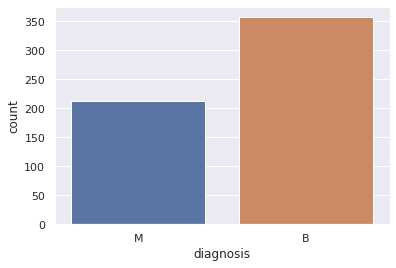

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x = y)       # M = 212, B = 357
B, M = y.value_counts(sort=True) #sort=True (default) in order to be sure B, M are in the right order (alphabetical)
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [ ]:
y_test = pd.DataFrame()
y_test['diagnosis'] = df['diagnosis'].map({'M':0,'B':1}) # map({'M':1,'B':0})
df = df.drop('diagnosis',axis=1)

In [ ]:
df = df.drop('id',axis=1)
df = df.drop('Unnamed: 32',axis=1)

In [ ]:
X = pd.DataFrame(preprocessing.scale(df.iloc[:,:]))

### **1. K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
 print("K-Means accuracy is",accuracy_score(y_test, y_kmeans))

K-Means accuracy is 0.9050966608084359


In [ ]:
print(classification_report(y_test, y_kmeans))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       212
           1       0.90      0.95      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.90       569



In [ ]:
print(confusion_matrix(y_test, y_kmeans))

[[176  36]
 [ 18 339]]


To find the number of clusters that fit the model correctly let us use elbow method.

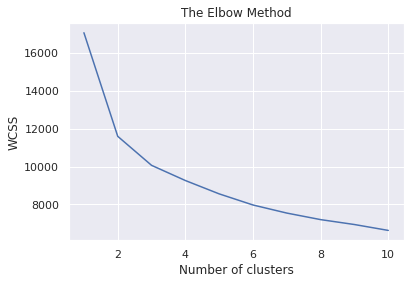

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Typically the elbow point is the one that is picked up for the number of clusters. In this case we can pickup 2,3,4 and this is debatable.

### **2.Hierarchical and Agglomerative clustering**

In [ ]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

print(accuracy_score(y_test, y_hc))

0.8804920913884007


In [ ]:
print(classification_report(y_test, y_hc))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       212
           1       0.88      0.94      0.91       357

    accuracy                           0.88       569
   macro avg       0.88      0.86      0.87       569
weighted avg       0.88      0.88      0.88       569



In [ ]:
print(confusion_matrix(y_test, y_hc))

[[164  48]
 [ 20 337]]


In [ ]:
#hierarchical clustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
np.set_printoptions(precision=4, suppress=True)

distance = linkage(X, 'ward')

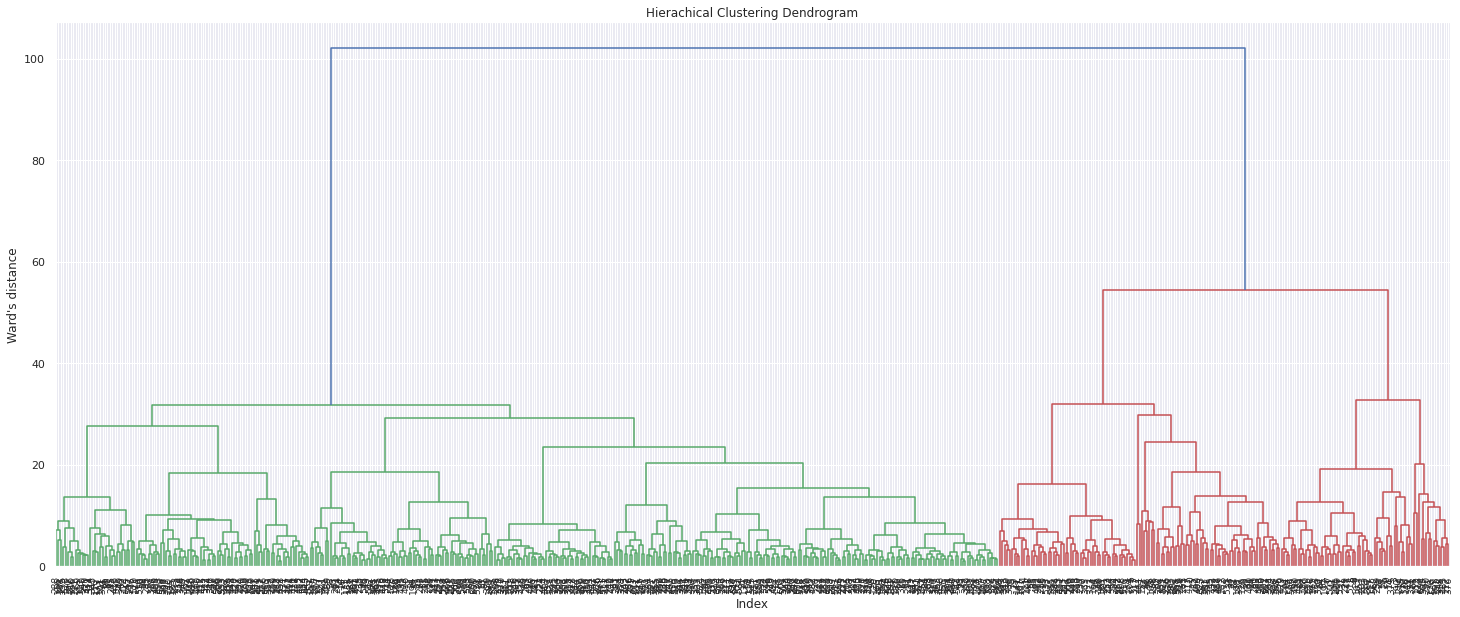

In [ ]:
plt.figure(figsize=(25,10))
plt.title("Hierachical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Ward's distance")
dendrogram(distance,
           leaf_rotation=90.,
           leaf_font_size=9.,);

In [ ]:
#By distance
from scipy.cluster.hierarchy import fcluster
max_d = 60
clusters = pd.DataFrame(fcluster(distance, max_d, criterion='distance'))
clusters[0] = clusters[0].map({1:1,2:0})
print(confusion_matrix(y_test, clusters))

[[164  48]
 [ 20 337]]


In [ ]:
# By Number of Clusters
k = 2
clusters = pd.DataFrame(fcluster(distance, k, criterion='maxclust'))
clusters[0] = clusters[0].map({1:1,2:0})
print(confusion_matrix(y_test, clusters))

[[164  48]
 [ 20 337]]


In [ ]:
clusters.shape

(569, 1)

### **3.Mean shift**

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

MeanShift(bandwidth=4.278648283323184, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [ ]:
meanshift_model.cluster_centers_

array([[-0.45435193, -0.34899353, -0.47518976, -0.46566144, -0.35843484,
        -0.57147348, -0.61529578, -0.61148842, -0.37920352, -0.25488568,
        -0.49092684, -0.24231898, -0.48903078, -0.42623942, -0.22252658,
        -0.46881471, -0.39265578, -0.4790545 , -0.20847421, -0.37598268,
        -0.48900258, -0.32518201, -0.50673229, -0.4853358 , -0.33973551,
        -0.50194111, -0.54743389, -0.56827988, -0.30031573, -0.38548955],
       [-0.66098389, -0.6305534 , -0.53460898, -0.63391948,  0.90662772,
         1.24433549,  0.96799686,  0.65080421,  3.16310935,  1.54694486,
        -0.3084866 ,  0.37946381, -0.28962223, -0.34360244, -0.53801478,
         0.60650552,  0.48396931,  1.07607669,  4.32706739,  0.31776749,
        -0.52375102,  0.11444284, -0.45665302, -0.50783132,  0.26877565,
         0.98560279,  0.85497394,  1.09469759,  4.6482789 ,  1.05590311]])

In [ ]:
y_ms = meanshift_model.labels_
num_clusters = len(np.unique(y_ms))
print('\nNumber of clusters in input data =', num_clusters)


Number of clusters in input data = 2


In [ ]:
y_ms = pd.DataFrame(y_ms)
y_ms[0] = y_ms[0].map({1:0,0:1})

In [ ]:
print(accuracy_score(y_test, y_ms))

0.6889279437609842


In [ ]:
print(classification_report(y_test, y_ms))

              precision    recall  f1-score   support

           0       0.86      0.20      0.32       212
           1       0.67      0.98      0.80       357

    accuracy                           0.69       569
   macro avg       0.77      0.59      0.56       569
weighted avg       0.74      0.69      0.62       569



In [ ]:
print(confusion_matrix(y_test,y_ms))

[[ 42 170]
 [  7 350]]


Observation: Too many False Positive. May need investigation in future

Let us display few graphs. I have repeated the same steps

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Drop unnecessary columns
cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)
# Encode diagnosis label
data['diagnonis'] = data['diagnosis'].map({'M':1,'B':0})
# Featureset creation
X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'KMeans clustering plot')

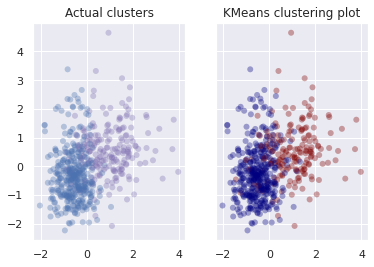

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

Text(0.5, 1.0, 'Agglomeratve clustering plot')

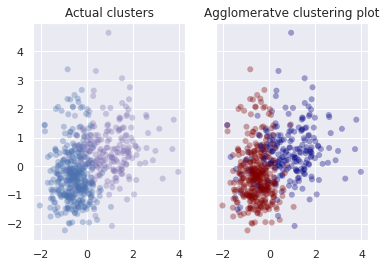

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Agglomeratve clustering plot")

Text(0.5, 1.0, 'MeanShift clustering plot')

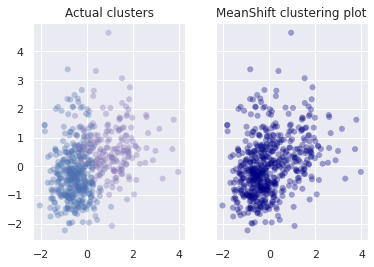

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_pred = ms.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ms_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("MeanShift clustering plot")

# **A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.**

According to the accuracy score, I find K-Means more accurate and easy to implement. It is computationally not very expensive and is very time efficient to give results.

# **Summary Key Findings and Insights.**

Overall, the K-Means model can be used to predict the chance of tumor in a human body with an accuracy of more than 90 per cent.

Key findings:

* Typically the elbow point is the one that is picked up for the number of clusters. In this case we can pickup 2,3,4 and this is debatable.
* Though K-Means is the basic algorithm to solve clustering problems, it has been proved the most effective one for this problem. Not everytime a complex clustering model like DBSCAN, Mean shift will give us more information or accuracy.

Checking correlation between variables will lead us to the next steps of how to split the data and what can be used as dependent and independent variables when we want to solve this problem by classification.

# **Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.**

There are other algorithm as well which will be included for comparison in future. Few of them can be seen here: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py



1.   MiniBatchKMeans
2.   AffinityPropagation
3. SpectralClustering
4. DBSCAN
5. Birch
6. GaussianMixture



